/home/nishanth/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)
/home/nishanth/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency h will be used.
  self._init_dates(dates, freq)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.66900D-01    |proj g|=  3.94458D-01


 This problem is unconstrained.



At iterate    5    f=  8.45220D-01    |proj g|=  1.35596D-01

At iterate   10    f=  8.19412D-01    |proj g|=  2.50501D-02

At iterate   15    f=  8.16540D-01    |proj g|=  2.28905D-02

At iterate   20    f=  8.14954D-01    |proj g|=  1.13857D-03

At iterate   25    f=  8.14902D-01    |proj g|=  3.56282D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     27     34      1     0     0   6.833D-06   8.149D-01
  F =  0.81490223221592106     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


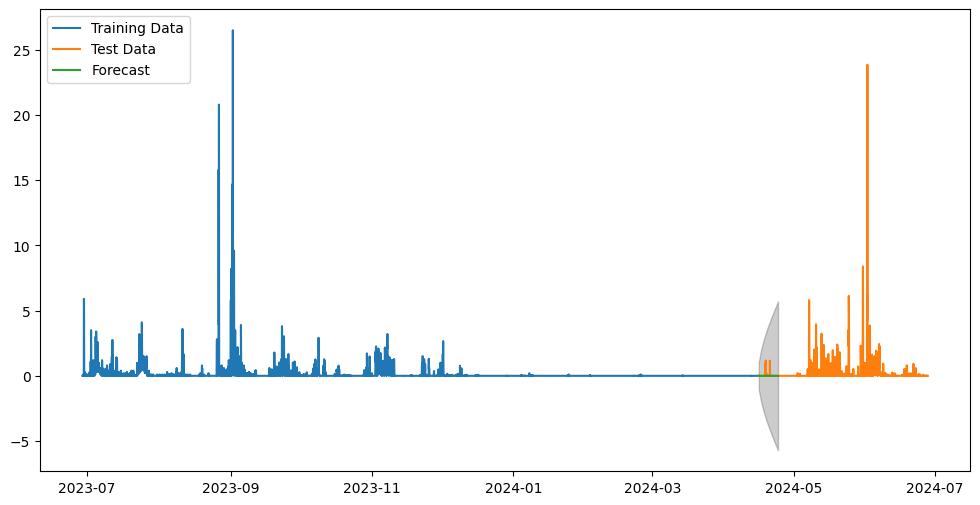

In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

# Load historical data
data = pd.read_csv('weather_data.csv', parse_dates=['time'], index_col='time')
temperature_data = data['rainfall']

# Split data into training and testing sets
train_data = temperature_data[:int(0.8*len(temperature_data))]
test_data = temperature_data[int(0.8*len(temperature_data)):]

# Fit the ARIMA model
model = SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
results = model.fit()

# Forecast for the next 100 days
forecast = results.get_forecast(steps=200)
forecast_df = forecast.conf_int()
forecast_df['Predicted'] = results.predict(start=forecast_df.index[0], end=forecast_df.index[-1])

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(test_data, label='Test Data')
plt.plot(forecast_df['Predicted'], label='Forecast')
plt.fill_between(forecast_df.index, forecast_df.iloc[:, 0], forecast_df.iloc[:, 1], color='k', alpha=0.2)
plt.legend()
plt.show()


In [3]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('weather_data.csv', parse_dates=['time'], index_col='time')
df

,rainfall,humidity,temperature
time,,,
2023-06-29 00:00:00,0.0,83,21.0
2023-06-29 01:00:00,0.0,85,20.6
2023-06-29 02:00:00,0.0,86,20.4
2023-06-29 03:00:00,0.0,87,20.3
2023-06-29 04:00:00,0.0,88,20.0
...,...,...,...
2024-06-27 19:00:00,0.0,72,23.6
2024-06-27 20:00:00,0.0,74,23.2
2024-06-27 21:00:00,0.0,76,22.9


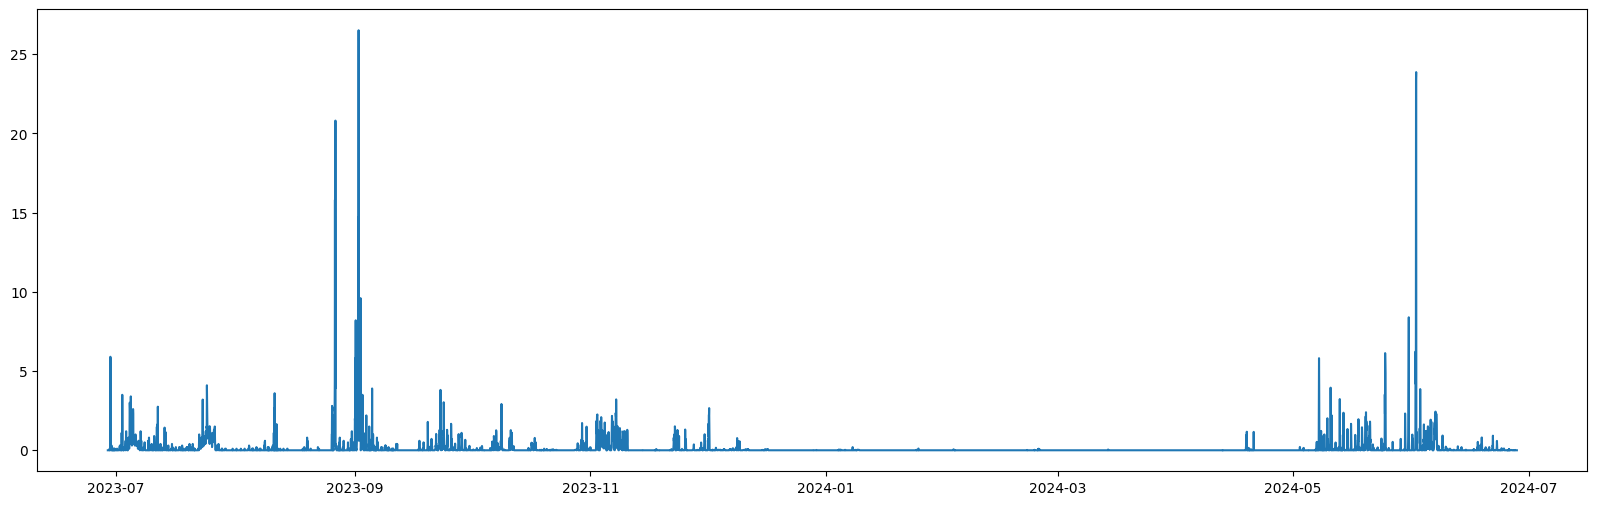

In [12]:
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['rainfall'])
plt.show()

In [ ]:
# Define the exogenous variables (humidity and rainfall)
exog = df[['humidity', 'rainfall']]

# Define the endogenous variable (temperature)
endog = df['temperature']

In [ ]:
# Fit SARIMAX model
model = SARIMAX(endog, exog=exog, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
model_fit = model.fit(disp=False)

In [ ]:
# Forecast the next 100 values
exog_forecast = exog[-100:]  # Assume you want to forecast using the last 100 exogenous values
forecast = model_fit.get_forecast(steps=100, exog=exog_forecast)

# Get forecasted values
forecasted_values = forecast.predicted_mean

In [ ]:


# Read data from CSV







# Save forecasted values to a new CSV
forecasted_values.to_csv('forecasted_weather.csv', header=['temperature_forecast'])
